# Neural network regression

In this many-to-one regression setup, we stack the series from all inverters into a long vector and try to predict the aggregate power a few steps ahead.

## Training

In [1]:
import core.preprocessing as pp
from core.neural_net_forecaster import NeuralNetForecaster

dm = pp.DataManager()
dm.load_all_and_split(kind='small', reindex=True)
dftrain = dm.detrended_train
dfdev = dm.detrended_dev

# Drop columns zeroed out by detrend transformation
for item in pp.DROP_LIST:
    key = 'S{:02}'.format(item)
    del dftrain[key]
    del dfdev[key]

problem = NeuralNetForecaster(dftrain, dfdev, arch='FC', nepochs=500, rmlogdir=True)

problem.make_forecasts()

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


Done with batch 1
Done with batch 101
Done with batch 201
Done with batch 301
Done with batch 401


## Prediction

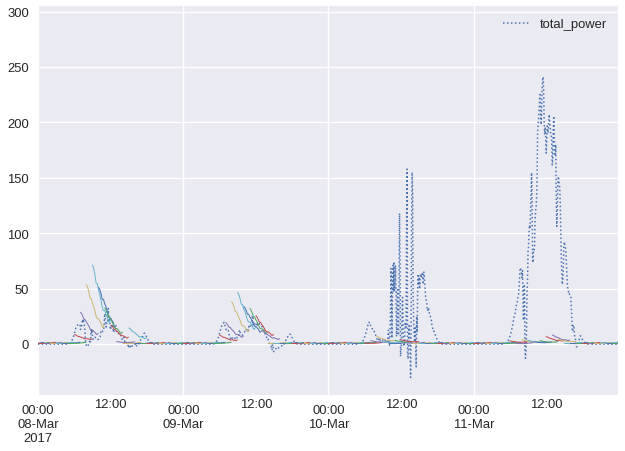

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk')

problem.plot_test()

ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 2*chunk
end = lim[0] + 6*chunk

ax.set_xlim(start, end)

plt.show()

In [3]:
# Add the forecasts to the DataManager class
dm.add_forecasts(problem.forecasts)
# Use data manager class to change all indices back to "real time"
dm.swap_index()

In [4]:
# With the forecasts in "real time" the default retrending function may be used
transformed_forecasts = [pp.retrend_data(f) for f in dm.forecasts]

In [5]:
# Translate back to "sequential time" for plotting
dm.add_forecasts(transformed_forecasts)
dm.swap_index()

(24815518.75, 24821276.25)

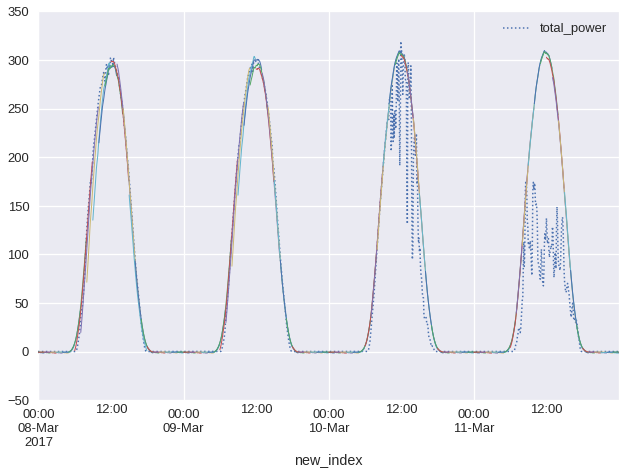

In [6]:
from core.utilities import plot_forecasts

plot_forecasts(dm.original_dev, dm.forecasts)
ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 2*chunk
end = lim[0] + 6*chunk
ax.set_ylim(-50, 350)
ax.set_xlim(start, end)

In [7]:
problem.calc_mse()

3337.5985314576296